In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
#Import dataframes 

df_player_stats = pd.read_csv('DataFiles/player_stats.csv')
df_bio = pd.read_csv('DataFiles/df_bio.csv')
data_index = pd.read_csv('DataFiles/data_index.csv')

In [3]:
columns_to_delete = ['PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
                     'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
                     'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
                     'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
                     'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
                     'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
                     'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK']

# Delete the specified columns
df_player_stats.drop(columns=columns_to_delete, inplace=True, errors='ignore')

df_player_stats.rename(columns={'Season_type': 'Season'}, inplace=True)

In [4]:
# Columns to be dropped in 'df_bio' table:
df_bio.drop(columns=['PLAYER_HEIGHT', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'PTS', 'REB', 'AST'], inplace=True, errors='ignore')

In [ ]:
# Merge 'df_player_stats' and ‘df_bio‘ on common keys ‘PLAYER_ID‘ and ‘Year‘ in order to get 'COUNTRY' column.
merged_df_stats_bio = pd.merge(df_player_stats, df_bio, on=['PLAYER_ID', 'Year', 'Season'], how='inner')

columns_to_delete_merged = ['GP_y','PTS_y','REB_y','AST_y','NET_RATING','OREB_PCT','DREB_PCT','USG_PCT', 'TS_PCT','AST_PCT']

merged_df_stats_bio.drop(columns=columns_to_delete_merged, inplace=True) 

In [6]:
# Checking the result of 'merged_df_stats_bio'
merged_df_stats_bio.shape

(18282, 49)

In [7]:
# Merging 'merged_df_stat_bio' with player index table on player-id to get player´s role/position.
final_merged_df = pd.merge(merged_df_stats_bio, data_index, left_on='PLAYER_ID', right_on='PERSON_ID', how='inner')

# Dropping all duplicate columns with trailing letter 'y'.
columns_to_drop = [col for col in final_merged_df.columns if 'y' in col]
final_merged_df.drop(columns=columns_to_drop, inplace=True)

# Dropping redundant columns
columns_to_drop_2 = [
    'PLAYER_LAST_NAME',
    'PLAYER_FIRST_NAME',
    'PLAYER_SLUG',
    'TEAM_ID',
    'TEAM_SLUG',
    'IS_DEFUNCT',
    'TEAM_NAME',
    'NICKNAME',
    'TEAM_ABBREVIATION',
    'ROSTER_STATUS',
    'STATS_TIMEFRAME', 
    'PERSON_ID',
    'TEAM_CITY'
]

final_merged_df.drop(columns=columns_to_drop_2, inplace=True)

In [8]:
# Drop '_x' at the end of column names 
for column in final_merged_df.columns: 
    if '_x' in column: 
        column_name = column.replace('_x', '')
        final_merged_df.rename(columns={column:column_name}, inplace=True)

# Change regular season name at 'Season' column  
final_merged_df['Season'] = final_merged_df['Season'].apply(lambda x:'Regular Season' if x =='Regular%20Season' else x)

In [ ]:
# # Output of final dataframe
# nj = final_merged_df[(final_merged_df['PLAYER_NAME'] == 'Nikola Jokic')]
# nj

# We don´t need:
# PFD, PLAYER_HEIGHT, PLAYER_HEIGHT_INCHES, PLAYER_WEIGHT, PTS, REB, AST

In [9]:
final_merged_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR
0,920,A.C. Green,1610612742,DAL,33.0,83,23,60,0.277,30.1,2.8,5.8,0.483,0.0,0.2,0.050,1.5,2.4,0.650,2.7,5.2,7.9,0.8,0.9,0.8,0.2,0.5,1.7,0.0,7.2,1996-97,Regular Season,Oregon State,USA,1985,1,23,-7.4,0.089,0.184,0.118,0.523,0.045,45,F,6-9,225.0,1985,2000
1,920,A.C. Green,1610612742,DAL,34.0,82,20,62,0.244,32.3,3.0,6.5,0.453,0.0,0.0,0.000,1.4,2.0,0.716,2.7,5.5,8.1,1.5,0.8,1.0,0.3,0.4,1.9,0.0,7.3,1997-98,Regular Season,Oregon State,USA,1985,1,23,-7.3,0.081,0.173,0.116,0.496,0.074,45,F,6-9,225.0,1985,2000
2,920,A.C. Green,1610612742,DAL,35.0,50,19,31,0.380,18.5,2.2,5.1,0.422,0.0,0.2,0.000,0.6,1.0,0.577,1.6,2.9,4.6,0.5,0.4,0.6,0.2,0.3,1.4,0.0,4.9,1998-99,Regular Season,Oregon State,USA,1985,1,23,-5.0,0.086,0.163,0.144,0.441,0.043,45,F,6-9,225.0,1985,2000
3,920,A.C. Green,1610612747,LAL,36.0,82,67,15,0.817,23.5,2.1,4.7,0.447,0.0,0.0,0.250,0.8,1.2,0.695,2.0,4.0,5.9,1.0,0.6,0.6,0.2,0.3,1.5,0.2,5.0,1999-00,Regular Season,Oregon State,USA,1985,1,23,8.3,0.080,0.160,0.110,0.482,0.058,45,F,6-9,225.0,1985,2000
4,920,A.C. Green,1610612747,LAL,36.0,23,15,8,0.652,18.7,1.6,3.9,0.411,0.0,0.0,0.000,0.7,1.0,0.696,1.9,2.3,4.2,0.6,0.4,0.6,0.1,0.2,1.9,0.1,3.9,1999-00,Playoffs,Oregon State,USA,1985,1,23,-3.9,0.095,0.126,0.115,0.449,0.044,45,F,6-9,225.0,1985,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,1631246,Vince Williams Jr.,1610612763,MEM,22.0,15,7,8,0.467,7.0,0.8,2.7,0.300,0.3,1.9,0.143,0.1,0.1,1.000,0.3,0.7,1.0,0.3,0.3,0.4,0.1,0.1,0.8,0.2,2.0,2022-23,Regular Season,Virginia Commonwealth,USA,2022,2,47,-14.8,0.030,0.120,0.176,0.367,0.062,5,G,6-4,205.0,2022,2023
18278,1631117,Walker Kessler,1610612762,UTA,21.0,74,34,40,0.459,23.0,4.0,5.6,0.720,0.0,0.0,0.333,1.1,2.1,0.516,3.1,5.3,8.4,0.9,0.8,0.4,2.3,0.5,2.3,1.7,9.2,2022-23,Regular Season,Auburn,USA,2022,1,22,3.0,0.133,0.205,0.130,0.702,0.057,24,C,7-0,245.0,2022,2023
18279,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,29,16,13,0.552,5.3,0.6,1.5,0.419,0.1,0.6,0.118,0.1,0.2,0.800,0.1,0.5,0.6,0.6,0.3,0.3,0.2,0.1,0.4,0.2,1.4,2022-23,Regular Season,Duke,USA,2022,1,26,-13.5,0.025,0.086,0.139,0.465,0.162,7,G,6-5,215.0,2022,2023
18280,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,1,0,1,0.000,2.1,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-23,Playoffs,Duke,USA,2022,1,26,20.0,0.000,0.000,0.200,0.000,0.000,7,G,6-5,215.0,2022,2023


In [10]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [11]:
# Function to filer on countries
def filter_non_europe(df, column_name='', country_list=europe):
    return df[~df[column_name].isin(europe)]

# New object df for European players only
usa_others_df = filter_non_europe(final_merged_df, 'COUNTRY')
usa_others_df.head(10)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR
0,920,A.C. Green,1610612742,DAL,33.0,83,23,60,0.277,30.1,2.8,5.8,0.483,0.0,0.2,0.050,1.5,2.4,0.650,2.7,5.2,7.9,0.8,0.9,0.8,0.2,0.5,1.7,0.0,7.2,1996-97,Regular Season,Oregon State,USA,1985,1,23,-7.4,0.089,0.184,0.118,0.523,0.045,45,F,6-9,225.0,1985,2000
1,920,A.C. Green,1610612742,DAL,34.0,82,20,62,0.244,32.3,3.0,6.5,0.453,0.0,0.0,0.000,1.4,2.0,0.716,2.7,5.5,8.1,1.5,0.8,1.0,0.3,0.4,1.9,0.0,7.3,1997-98,Regular Season,Oregon State,USA,1985,1,23,-7.3,0.081,0.173,0.116,0.496,0.074,45,F,6-9,225.0,1985,2000
2,920,A.C. Green,1610612742,DAL,35.0,50,19,31,0.380,18.5,2.2,5.1,0.422,0.0,0.2,0.000,0.6,1.0,0.577,1.6,2.9,4.6,0.5,0.4,0.6,0.2,0.3,1.4,0.0,4.9,1998-99,Regular Season,Oregon State,USA,1985,1,23,-5.0,0.086,0.163,0.144,0.441,0.043,45,F,6-9,225.0,1985,2000
3,920,A.C. Green,1610612747,LAL,36.0,82,67,15,0.817,23.5,2.1,4.7,0.447,0.0,0.0,0.250,0.8,1.2,0.695,2.0,4.0,5.9,1.0,0.6,0.6,0.2,0.3,1.5,0.2,5.0,1999-00,Regular Season,Oregon State,USA,1985,1,23,8.3,0.080,0.160,0.110,0.482,0.058,45,F,6-9,225.0,1985,2000
4,920,A.C. Green,1610612747,LAL,36.0,23,15,8,0.652,18.7,1.6,3.9,0.411,0.0,0.0,0.000,0.7,1.0,0.696,1.9,2.3,4.2,0.6,0.4,0.6,0.1,0.2,1.9,0.1,3.9,1999-00,Playoffs,Oregon State,USA,1985,1,23,-3.9,0.095,0.126,0.115,0.449,0.044,45,F,6-9,225.0,1985,2000
5,920,A.C. Green,1610612748,MIA,37.0,82,50,32,0.610,17.2,1.8,4.0,0.444,0.0,0.1,0.000,1.0,1.4,0.712,1.3,2.5,3.8,0.5,0.5,0.4,0.1,0.4,1.5,0.0,4.5,2000-01,Regular Season,Oregon State,USA,1985,1,23,3.8,0.076,0.151,0.137,0.492,0.050,45,F,6-9,225.0,1985,2000
6,920,A.C. Green,1610612748,MIA,37.0,3,0,3,0.000,7.1,0.3,1.0,0.333,0.0,0.0,0.000,0.3,0.3,1.000,0.3,1.0,1.3,0.7,0.3,0.3,0.0,0.0,1.3,0.0,1.0,2000-01,Playoffs,Oregon State,USA,1985,1,23,-24.0,0.045,0.136,0.082,0.436,0.154,45,F,6-9,225.0,1985,2000
7,243,Aaron McKie,1610612765,DET,24.0,83,48,35,0.578,19.6,1.8,4.4,0.411,0.5,1.2,0.398,1.1,1.3,0.836,0.5,2.2,2.7,1.9,1.1,0.9,0.3,0.4,1.6,0.0,5.2,1996-97,Regular Season,Temple,USA,1994,1,17,3.7,0.026,0.113,0.142,0.524,0.163,2,G,6-5,209.0,1994,2006
8,243,Aaron McKie,1610612765,DET,24.0,5,2,3,0.400,19.3,1.4,4.0,0.350,0.2,1.0,0.200,0.0,0.0,0.000,0.2,1.8,2.0,2.0,0.6,1.2,0.4,0.8,2.4,1.0,3.0,1996-97,Playoffs,Temple,USA,1994,1,17,4.6,0.011,0.101,0.116,0.375,0.179,2,G,6-5,209.0,1994,2006
9,243,Aaron McKie,1610612755,PHI,25.0,81,34,47,0.420,22.4,1.7,4.7,0.365,0.1,0.8,0.190,0.5,0.7,0.764,0.7,2.1,2.9,2.2,0.9,1.2,0.2,0.4,2.0,0.0,4.1,1997-98,Regular Season,Temple,USA,1994,1,17,1.8,0.032,0.098,0.117,0.410,0.159,2,G,6-5,209.0,1994,2006


Count of Players by Position:
G      6018
F      4668
C      1629
G-F    1416
F-C    1177
C-F     980
F-G     628
Name: POSITION, dtype: int64


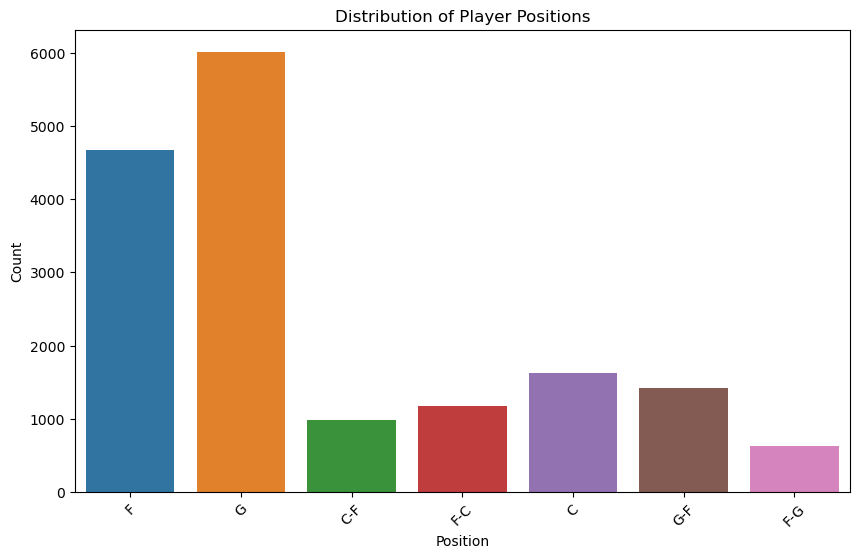


Correlation of Position with Average Points per Game:
POSITION
F-G    9.117197
G      8.862263
C-F    8.497347
G-F    8.409463
F      8.106491
F-C    7.156245
C      5.873358
Name: PTS, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count of Players by Position
position_counts = usa_others_df['POSITION'].value_counts()
print("Count of Players by Position:")
print(position_counts)

# Visualization of Position Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=usa_others_df, x='POSITION')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# # Summary Statistics
# print("\nSummary Statistics for Position:")
# print(position_counts.describe())

# Correlation with other variables (example: PTS)
position_pts_corr = usa_others_df.groupby('POSITION')['PTS'].mean().sort_values(ascending=False)
print("\nCorrelation of Position with Average Points per Game:")
print(position_pts_corr)


In [35]:
# Count the unique occurrences of player names
unique_player_count = usa_others_df['PLAYER_NAME'].nunique()
unique_player_count

2299

1. Points per Game (PPG): Average number of points scored by the player per game. 

In [44]:
# Grouping the data by player name and calculating the sum of games played for each player
player_games_played = usa_others_df.groupby('PLAYER_NAME')['GP'].sum()

# Grouping the data by player name and calculating the average PPG for each player
player_ppg = usa_others_df.groupby('PLAYER_NAME')['PTS'].mean()

# Combining player games played and average PPG into a single DataFrame
player_stats = pd.DataFrame({'Games Played': player_games_played, 'Average PPG': player_ppg})

# Sorting the players based on the sum of games played and selecting the top 20 players
top_20_players = player_games_played.sort_values(ascending=False).head(10)

# Filtering the usa_other_df DataFrame to include only the top 20 players
top_20_data = usa_others_df[usa_others_df['PLAYER_NAME'].isin(top_20_players.index)]

# Grouping the top 20 players' data by player name to include their entire playing career
grouped_top_20_data = top_20_data.groupby('PLAYER_NAME').agg('first')

# Merging the player_stats DataFrame with grouped_top_20_data to include the sum of games played
final_data = pd.merge(grouped_top_20_data, player_stats, left_index=True, right_index=True)

# Sorting the final data based on the sum of games played
ppg_others_df = final_data.sort_values(by='Average PPG', ascending=False)
ppg_others_df

,PLAYER_ID,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,Games Played,Average PPG
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LeBron James,2544,1610612739,CLE,19.0,79,33,46,0.418,39.6,7.9,18.9,0.417,0.8,2.7,0.290,4.4,5.8,0.754,1.3,4.2,5.5,5.9,3.5,1.6,0.7,1.0,1.9,0.0,20.9,2003-04,Regular Season,None,USA,2003,1,1,-2.0,0.031,0.104,0.276,0.488,0.268,23,F,6-9,250.0,2003,2023,1703,27.733333
Kobe Bryant,977,1610612747,LAL,18.0,71,48,23,0.676,15.5,2.5,5.9,0.417,0.7,1.9,0.375,1.9,2.3,0.819,0.7,1.2,1.9,1.3,1.6,0.7,0.3,0.3,1.4,0.0,7.6,1996-97,Regular Season,None,USA,1996,1,13,1.9,0.042,0.075,0.239,0.544,0.144,24,F-G,6-6,212.0,1996,2015,1566,24.497143
Tim Duncan,1495,1610612759,SAS,22.0,82,56,26,0.683,39.1,8.6,15.7,0.549,0.0,0.1,0.000,3.9,5.9,0.662,3.3,8.6,11.9,2.7,3.4,0.7,2.5,1.2,3.1,0.0,21.1,1997-98,Regular Season,Wake Forest,US Virgin Islands,1997,1,1,7.6,0.096,0.210,0.259,0.577,0.131,21,C-F,6-11,250.0,1997,2015,1643,19.472973
Ray Allen,951,1610612749,MIL,21.0,82,33,49,0.402,31.0,4.8,11.1,0.430,1.4,3.6,0.393,2.5,3.0,0.823,1.2,2.8,4.0,2.6,1.8,0.9,0.1,0.7,2.7,0.0,13.4,1996-97,Regular Season,Connecticut,USA,1996,1,5,-1.0,0.041,0.097,0.209,0.541,0.133,34,G,6-5,205.0,1996,2013,1471,18.444828
Paul Pierce,1718,1610612738,BOS,21.0,48,19,29,0.396,34.0,5.9,13.5,0.439,1.8,4.3,0.412,2.9,4.1,0.713,2.4,4.0,6.4,2.4,2.4,1.7,1.0,1.0,2.9,0.0,16.5,1998-99,Regular Season,Kansas,USA,1998,1,10,-1.9,0.070,0.121,0.229,0.540,0.121,34,F,6-7,235.0,1998,2016,1513,18.363636
Kevin Garnett,708,1610612750,MIN,21.0,77,40,37,0.519,38.8,7.1,14.3,0.499,0.1,0.3,0.286,2.7,3.5,0.754,2.5,5.6,8.0,3.1,2.3,1.4,2.1,0.5,2.6,0.0,17.0,1996-97,Regular Season,None,USA,1995,1,5,2.1,0.069,0.145,0.213,0.537,0.139,21,F,6-11,240.0,1995,2015,1525,17.826471
Vince Carter,1713,1610612761,TOR,22.0,50,23,27,0.460,35.2,6.9,15.3,0.450,0.4,1.3,0.288,4.1,5.4,0.761,1.9,3.8,5.7,3.0,2.2,1.1,1.5,0.8,2.8,0.0,18.3,1998-99,Regular Season,North Carolina,USA,1998,1,5,1.2,0.053,0.111,0.253,0.516,0.164,15,G-F,6-6,220.0,1998,2019,1629,16.609091
Jason Terry,1891,1610612737,ATL,22.0,81,28,53,0.346,23.3,3.1,7.4,0.415,0.6,1.9,0.293,1.4,1.7,0.807,0.3,1.8,2.0,4.3,1.9,1.1,0.1,0.4,1.6,0.1,8.1,1999-00,Regular Season,Arizona,USA,1999,1,10,-6.8,0.012,0.074,0.189,0.497,0.300,3,G,6-2,185.0,1999,2017,1534,12.656250
Andre Iguodala,2738,1610612755,PHI,21.0,82,43,39,0.524,32.7,3.3,6.7,0.493,0.6,1.7,0.331,1.9,2.6,0.743,1.1,4.6,5.7,3.0,1.7,1.7,0.6,0.3,2.5,0.0,9.0,2004-05,Regular Season,Arizona,USA,2004,1,9,0.0,0.033,0.141,0.127,0.580,0.139,9,G-F,6-6,215.0,2004,2022,1408,10.200000


In [64]:
# Calculate Field Goal Percentage (FG%)
usa_others_df['FG%'] = (usa_others_df['FGM'] / usa_others_df['FGA']) * 100

# Group the data by player name and calculate the sum of games played for each player
player_games_played = usa_others_df.groupby('PLAYER_NAME')['GP'].sum()

# Group the data by player name and calculate the average PPG for each player
player_ppg = usa_others_df.groupby('PLAYER_NAME')['PTS'].mean()

# Group the data by player name and calculate the average FG% for each player
player_fg_percentage = usa_others_df.groupby('PLAYER_NAME')['FG%'].mean()

# Combine player games played, average PPG, and average FG% into a single DataFrame
player_stats = pd.DataFrame({'GP': player_games_played, 'Average PTS': player_ppg, 'Average FG%': player_fg_percentage})

# Sort the players based on the sum of games played and select the top 20 players
top_20_players = player_games_played.sort_values(ascending=False)

# Filter the usa_others_df DataFrame to include only the top 20 players
top_20_data = usa_others_df[usa_others_df['PLAYER_NAME'].isin(top_20_players.index)]

# Group the top 20 players' data by player name to include their entire playing career
grouped_top_20_data = top_20_data.groupby('PLAYER_NAME').agg('first').head(10)

# Merge the player_stats DataFrame with grouped_top_20_data to include the sum of games played
final_data = pd.merge(grouped_top_20_data, player_stats, left_index=True, right_index=True)

# Sort the final data based on the sum of games played
fgp_others_df= final_data.sort_values(by='Average FG%', ascending=False)
fgp_others_df


/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_28277/3359703443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_others_df['FG%'] = (usa_others_df['FGM'] / usa_others_df['FGA']) * 100


,PLAYER_ID,TEAM_ID,TEAM_ABBREVIATION,AGE,GP_x,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,FG%,GP_y,Average PTS,Average FG%
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Lawson,1630639,1610612742,DAL,22.0,15,5,10,0.333,7.2,1.5,2.9,0.500,0.7,1.7,0.400,0.1,0.5,0.250,0.4,1.0,1.4,0.1,0.2,0.1,0.0,0.2,0.7,0.4,3.7,2022-23,Regular Season,South Carolina,Canada,Undrafted,Undrafted,Undrafted,-20.1,0.046,0.152,0.189,0.589,0.032,9,G,6-6,179.0,2022,2023,51.724138,15,3.700000,51.724138
Aaron Gordon,203932,1610612753,ORL,19.0,47,14,33,0.298,17.0,2.0,4.4,0.447,0.3,1.0,0.271,0.9,1.3,0.721,1.0,2.6,3.6,0.7,0.8,0.4,0.5,0.3,1.8,1.1,5.2,2014-15,Regular Season,Arizona,USA,2014,1,4,-7.9,0.058,0.151,0.151,0.517,0.064,50,F,6-8,235.0,2014,2023,45.454545,636,13.246154,46.878083
AJ Griffin,1631100,1610612737,ATL,19.0,72,34,38,0.472,19.5,3.4,7.4,0.465,1.4,3.6,0.390,0.6,0.7,0.894,0.5,1.6,2.1,1.0,0.6,0.6,0.2,0.3,1.2,0.6,8.9,2022-23,Regular Season,Duke,USA,2022,1,16,1.5,0.026,0.080,0.174,0.577,0.070,14,F,6-6,220.0,2022,2023,45.945946,72,8.900000,45.945946
Aaron Brooks,201166,1610612745,HOU,23.0,51,36,15,0.706,11.9,1.8,4.4,0.413,0.7,2.1,0.330,0.8,1.0,0.857,0.3,0.8,1.1,1.7,0.9,0.3,0.1,0.2,1.4,1.0,5.2,2007-08,Regular Season,Oregon,USA,2007,1,26,-1.3,0.022,0.075,0.216,0.535,0.249,30,G,6-0,161.0,2007,2017,40.909091,685,7.893750,43.371814
A.C. Green,920,1610612742,DAL,33.0,83,23,60,0.277,30.1,2.8,5.8,0.483,0.0,0.2,0.050,1.5,2.4,0.650,2.7,5.2,7.9,0.8,0.9,0.8,0.2,0.5,1.7,0.0,7.2,1996-97,Regular Season,Oregon State,USA,1985,1,23,-7.4,0.089,0.184,0.118,0.523,0.045,45,F,6-9,225.0,1985,2000,48.275862,405,4.828571,42.610494
AJ Hammons,1627773,1610612742,DAL,24.0,22,4,18,0.182,7.4,0.8,1.9,0.405,0.2,0.5,0.500,0.4,0.9,0.450,0.4,1.3,1.6,0.2,0.5,0.0,0.6,0.2,1.0,0.6,2.2,2016-17,Regular Season,Purdue,USA,2016,2,46,-0.3,0.045,0.172,0.165,0.472,0.038,20,C,7-0,260.0,2016,2016,42.105263,22,2.200000,42.105263
AJ Green,1631260,1610612749,MIL,23.0,35,27,8,0.771,9.9,1.5,3.6,0.424,1.3,3.0,0.419,0.1,0.1,1.000,0.2,1.1,1.3,0.6,0.3,0.2,0.0,0.0,0.9,0.1,4.4,2022-23,Regular Season,Northern Iowa,USA,Undrafted,Undrafted,Undrafted,-4.9,0.016,0.105,0.159,0.607,0.092,20,G,6-4,190.0,2022,2023,41.666667,35,4.400000,41.666667
AJ Price,201985,1610612754,IND,23.0,56,23,33,0.411,15.5,2.6,6.3,0.410,1.1,3.1,0.345,1.1,1.3,0.800,0.2,1.4,1.6,1.9,1.1,0.6,0.1,0.3,0.9,1.4,7.3,2009-10,Regular Season,Connecticut,USA,2009,2,52,3.9,0.013,0.085,0.219,0.530,0.198,12,G,6-2,185.0,2009,2014,41.269841,270,5.125000,40.903117
A.J. Guyton,2062,1610612741,CHI,23.0,33,6,27,0.182,19.0,2.4,5.8,0.406,0.8,2.1,0.391,0.5,0.5,0.833,0.3,0.8,1.1,1.9,0.7,0.3,0.2,0.1,1.1,0.0,6.0,2000-01,Regular Season,Indiana,USA,2000,2,32,-11.0,0.016,0.046,0.167,0.495,0.198,11,G,6-2,185.0,2000,2002,41.379310,80,3.800000,26.138782


Three-Point Percentage (3P%): Percentage of three-point shots made out of attempted three-pointers, measuring accuracy from beyond the arc.

In [91]:
# Group by player names (PLAYER_NAME) and sum games played (GP)
player_stats = usa_others_df.groupby('PLAYER_NAME').agg({'GP': 'sum', 'FG3M': 'sum', 'FG3A': 'sum'}).reset_index()

# Calculate three-point percentage (3P%) for each player
player_stats['3P%'] = (player_stats['FG3M'] / player_stats['FG3A']) * 100

# Sort the DataFrame by 3P% in descending order
player_stats_sorted = player_stats.sort_values(by='3P%', ascending=False)

player_stats_sorted.head(20)

# Display the resulting DataFrame with player names, summed games played, and 3P% sorted by 3P%
# print(player_stats_sorted[['PLAYER_NAME', 'GP', '3P%']])


,PLAYER_NAME,GP,FG3M,FG3A,3P%
67,Alvin Sims,4,0.3,0.3,100.000000
2151,Trevon Duval,3,0.3,0.3,100.000000
2071,Terry Cummings,211,0.1,0.1,100.000000
667,Dwayne Schintzius,31,0.1,0.1,100.000000
147,Art Long,98,0.1,0.1,100.000000
722,Eric Moreland,91,0.2,0.2,100.000000
423,Coty Clarke,3,0.7,0.7,100.000000
1827,Reggie Jordan,141,0.5,0.5,100.000000
1356,Kosta Koufos,723,0.2,0.2,100.000000
1197,Jordan Sibert,1,1.0,1.0,100.000000


4.Free Throw Percentage (FT%): Percentage of free throw shots made out of attempted free throws, reflecting proficiency at the free-throw line.

In [ ]:
# Calculate Free Throw Percentage (FT%)
usa_others_df['FT%'] = (usa_others_df['FTM'] / usa_others_df['FTA']) * 100

# Grouping players by name and calculating mean and sum of FT%
player_stats = usa_others_df.groupby('PLAYER_NAME').agg({
    'FT%': ['mean', 'sum']
}).reset_index()

# Rename columns for clarity
player_stats.columns = ['Player', 'Mean_FT%', 'Sum_FT%']

# Sort the player_stats dataframe by Mean_FT% in descending order and get the top 20 players
free_throw_others_players = player_stats.sort_values(by='Mean_FT%', ascending=False).head(20)

free_throw_others_players


5.Rebounds per Game (RPG): Average number of rebounds grabbed by the player per game, indicating their ability to secure missed shots.

In [96]:
# Grouping players by name and calculating the mean OREB
player_stats = usa_others_df.groupby('PLAYER_NAME')['OREB'].mean().reset_index()

# Sort the player_stats dataframe by RPG in descending order and get the top 20 players
oreb_others_players = player_stats.sort_values(by='OREB', ascending=False).head(20)

oreb_others_players 

,PLAYER_NAME,OREB
1062,Jayson Williams,6.075000
560,Dennis Rodman,4.266667
81,Andre Drummond,3.933333
1638,Mitchell Robinson,3.816667
669,Dwight Howard,3.450000
2035,Steven Adams,3.417647
948,Jalen Duren,3.400000
318,Charles Barkley,3.385714
1977,Shaquille O'Neal,3.379310
2165,Tristan Thompson,3.194444


In [97]:
# Grouping players by name and calculating the mean DREB
player_stats = usa_others_df.groupby('PLAYER_NAME')['DREB'].mean().reset_index()

# Sort the player_stats dataframe by RPG in descending order and get the top 20 players
dreb_top_others_players = player_stats.sort_values(by='DREB', ascending=False).head(20)

dreb_top_others_players 


,PLAYER_NAME,DREB
1137,Joel Embiid,8.807692
560,Dennis Rodman,8.533333
1266,Karl-Anthony Towns,8.445455
669,Dwight Howard,8.366667
1321,Kevin Garnett,8.200000
2092,Tim Duncan,8.035135
112,Anthony Davis,8.031250
318,Charles Barkley,7.900000
1327,Kevin Love,7.770000
81,Andre Drummond,7.646667


In [99]:
# Grouping players by name and calculating the mean REB
player_stats = usa_others_df.groupby('PLAYER_NAME')['REB'].mean().reset_index()

# Sort the player_stats dataframe by RPG in descending order and get the top 20 players
reb_top_others_players = player_stats.sort_values(by='REB', ascending=False).head(20)

reb_top_others_players 

,PLAYER_NAME,REB
1062,Jayson Williams,13.275000
560,Dennis Rodman,12.800000
669,Dwight Howard,11.803333
81,Andre Drummond,11.573333
318,Charles Barkley,11.300000
1266,Karl-Anthony Towns,11.018182
1137,Joel Embiid,10.992308
2092,Tim Duncan,10.883784
1321,Kevin Garnett,10.541176
112,Anthony Davis,10.500000


In [100]:
# Grouping players by name and calculating the mean APG and total games played in their career
player_stats = usa_others_df.groupby('PLAYER_NAME',).agg({
    'AST': 'mean',
    'GP': 'sum'  # Summing 'GamesPlayed' column to get total games played in career
}).reset_index()

# Rename columns for clarity
player_stats.columns = ['PLAYER_NAME', 'AVG_APG', 'TotalGamesPlayed']

# Sort the player_stats DataFrame by Mean_APG in descending order and get the top 20 players
apg_others_players = player_stats.sort_values(by='AVG_APG', ascending=False).head(20)

apg_others_players


,PLAYER_NAME,AVG_APG,TotalGamesPlayed
2131,Trae Young,9.050000,380
1158,John Wall,8.986667,684
373,Chris Paul,8.930303,1363
1156,John Stockton,8.742857,599
1034,Jason Kidd,8.432353,1389
1904,Russell Westbrook,8.225926,1210
1796,Rajon Rondo,8.069231,1091
2193,Tyrese Haliburton,7.966667,191
2032,Steve Nash,7.923333,1337
912,Ja Morant,7.785714,267


7. Steals per Game (SPG): Average number of steals made by the player per game, showcasing their defensive prowess and ability to force turnovers.

In [101]:
# Grouping players by name and country, and calculating the mean SPG and total games played in their career
player_stats = usa_others_df.groupby(['PLAYER_NAME', 'COUNTRY']).agg({
    'STL': 'mean',
    'GP': 'sum'  # Summing 'GamesPlayed' column to get total games played in career
}).reset_index()

# Sort the player_stats DataFrame by Mean_SPG in descending order and get the top 20 players
spg_others_players = player_stats.sort_values(by='STL', ascending=False).head(20)

spg_others_players

,PLAYER_NAME,COUNTRY,STL,GP
930,Jacob Gilyard,USA,3.000000,1
1646,Mookie Blaylock,USA,2.100000,396
59,Allen Iverson,USA,2.045455,985
373,Chris Paul,USA,2.015152,1363
1833,Renaldo Major,USA,2.000000,1
1034,Jason Kidd,USA,1.997059,1389
161,Baron Davis,USA,1.830000,885
651,Doug Christie,USA,1.806250,723
1268,Kawhi Leonard,USA,1.780952,765
401,Clyde Drexler,USA,1.750000,153


8. Blocks per Game (BPG): Average number of shots blocked by the player per game, highlighting their shot-blocking and rim-protecting skills.

In [103]:
# Grouping players by name and calculating the total blocks and total games played
player_stats = usa_others_df.groupby('PLAYER_NAME').agg({
    'BLK': 'sum',  # Total blocks
    'GP': 'sum'  # Total games played
}).reset_index()

# Calculate Blocks per Game (BPG) for each player over their entire career
player_stats['Career_BPG'] = player_stats['BLK'] / player_stats['GP']

# Sort the player_stats DataFrame by Career_BPG in descending order and get the top 20 players
bpg_others_players = player_stats.sort_values(by='BLK', ascending=False).head(20)

bpg_others_players

,PLAYER_NAME,BLK,GP,Career_BPG
2092,Tim Duncan,81.0,1643,0.049300
1495,Marcus Camby,60.1,1052,0.057129
1977,Shaquille O'Neal,58.9,1092,0.053938
1093,Jermaine O'Neal,53.7,1108,0.048466
669,Dwight Howard,52.7,1367,0.038552
1960,Serge Ibaka,46.3,1071,0.043231
619,Dikembe Mutombo,45.8,891,0.051403
1321,Kevin Garnett,45.7,1525,0.029967
171,Ben Wallace,44.3,1218,0.036371
63,Alonzo Mourning,43.9,632,0.069462


9.Turnovers per Game (TOV): Average number of turnovers committed by the player per game, indicating ball security and decision-making efficiency.

In [105]:
# Grouping players by name and calculating the total turnovers and total games played
player_stats = usa_others_df.groupby('PLAYER_NAME').agg({
    'TOV': 'sum',  # Total turnovers
    'GP': 'sum'  # Total games played
}).reset_index()

# Calculate Turnovers per Game (TOV) for each player over their entire career
player_stats['Career_TOV'] = player_stats['TOV'] / player_stats['GP']

# Sort the player_stats DataFrame by Career_TOV in ascending order and get the top 20 players
tov_others_players = player_stats.sort_values(by='TOV', ascending=False).head(10)

tov_others_players

,PLAYER_NAME,TOV,GP,Career_TOV
1408,LeBron James,128.4,1703,0.075396
1904,Russell Westbrook,110.9,1210,0.091653
1352,Kobe Bryant,108.2,1566,0.069093
980,James Harden,102.1,1160,0.088017
671,Dwyane Wade,95.6,1231,0.077660
1034,Jason Kidd,93.5,1389,0.067315
2092,Tim Duncan,91.1,1643,0.055447
1318,Kevin Durant,88.8,1152,0.077083
1752,Paul Pierce,88.2,1513,0.058295
2032,Steve Nash,82.7,1337,0.061855
